In [1]:
import os
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
import shap

In [2]:
# lock value for train/test split and machine learning
random_state = 55555555      # 55555555                                  # change three or more times for evaluate of machine learning valiance

param_grid_gbdt = {"learning_rate":[i/1000 for i in range(1,502,5)],     # learning rate
                   "max_depth":[2,3,4,5],                                # depth of estimators
                   "n_estimators":[300] ,                                # number of estimators
                   "random_state":[random_state]}                        # random state     

gbdt=GridSearchCV(GradientBoostingRegressor(),param_grid_gbdt,cv=5)

In [3]:
data=pd.read_excel("Rounds2-5_data.xlsx", sheet_name=0)   #Select regular or time-saving
data

,No.,ExNo.,IgG_product,mix1,mix2,mix3,mix4,mix5,L-Tyrosine disodium salt dihydrate,L-Proline,L-Cysteine hydrochloride-H2O,L-Serine,L-Glutamic Acid,L-Glutamine
0,1,1,0.860108,0.25,0.25,0.250,0.250,4.000,0.25,0.250,0.250,0.250,0.250,4.000
1,2,2,0.770758,0.25,0.25,0.250,2.125,2.125,0.25,2.125,2.125,2.125,0.250,2.125
2,3,3,0.505415,0.25,0.25,0.250,4.000,0.250,0.25,4.000,4.000,4.000,0.250,0.250
3,4,4,0.807762,0.25,0.25,2.125,0.250,2.125,0.25,0.250,0.250,0.250,2.125,2.125
4,5,5,0.601083,0.25,0.25,2.125,2.125,0.250,0.25,2.125,2.125,2.125,2.125,0.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,112,41,1.038198,5.00,3.40,5.000,4.400,3.000,10.00,10.000,10.000,10.000,2.000,1.000
112,113,42,1.003918,5.00,4.40,5.000,4.400,3.000,5.00,4.400,4.400,4.400,5.000,3.000
113,114,43,0.646123,5.00,4.40,5.000,5.000,3.000,5.00,5.000,5.000,5.000,5.000,3.000
114,115,44,0.696376,5.00,4.40,5.000,3.800,1.000,5.00,3.800,3.800,3.800,5.000,1.000


In [4]:
# split date and display train data
train, test = train_test_split(data, test_size=0.25, random_state=random_state)
train

,No.,ExNo.,IgG_product,mix1,mix2,mix3,mix4,mix5,L-Tyrosine disodium salt dihydrate,L-Proline,L-Cysteine hydrochloride-H2O,L-Serine,L-Glutamic Acid,L-Glutamine
47,48,24,1.000000,1.00,1.00,1.000,1.000,1.000,1.00,1.000,1.000,1.000,1.000,1.000
76,77,6,1.127273,5.00,3.40,5.000,4.400,3.000,2.00,2.000,10.000,10.000,2.000,1.000
95,96,25,0.969638,5.00,3.40,5.000,4.400,3.000,6.00,10.000,2.000,2.000,6.000,4.500
36,37,13,0.884906,2.25,4.00,2.250,0.500,3.250,2.25,0.500,0.500,0.500,2.250,3.250
14,15,15,0.457581,4.00,0.25,0.250,0.250,0.250,4.00,0.250,0.250,0.250,0.250,0.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,98,27,0.969638,5.00,3.40,5.000,4.400,3.000,6.00,10.000,6.000,6.000,2.000,8.000
2,3,3,0.505415,0.25,0.25,0.250,4.000,0.250,0.25,4.000,4.000,4.000,0.250,0.250
3,4,4,0.807762,0.25,0.25,2.125,0.250,2.125,0.25,0.250,0.250,0.250,2.125,2.125
40,41,17,1.083962,4.00,2.25,2.250,4.000,6.000,4.00,4.000,4.000,4.000,2.250,6.000


In [5]:
features=data.columns[3:]
features

Index(['mix1', 'mix2', 'mix3', 'mix4', 'mix5',
       'L-Tyrosine disodium salt dihydrate', 'L-Proline',
       'L-Cysteine hydrochloride-H2O', 'L-Serine', 'L-Glutamic Acid',
       'L-Glutamine'],
      dtype='object')

In [6]:
gbdt.fit(train[features],train["IgG_product"])

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.001, 0.006, 0.011, 0.016, 0.021,
                                           0.026, 0.031, 0.036, 0.041, 0.046,
                                           0.051, 0.056, 0.061, 0.066, 0.071,
                                           0.076, 0.081, 0.086, 0.091, 0.096,
                                           0.101, 0.106, 0.111, 0.116, 0.121,
                                           0.126, 0.131, 0.136, 0.141, 0.146, ...],
                         'max_depth': [2, 3, 4, 5], 'n_estimators': [300],
                         'random_state': [55555555]})

In [8]:
best_model = gbdt.best_estimator_

gbdt_importance = best_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': features,
    'GBDT_Importance': gbdt_importance
}).sort_values(by='GBDT_Importance', ascending=False)

importance_df

,Feature,GBDT_Importance
10,L-Glutamine,0.232736
7,L-Cysteine hydrochloride-H2O,0.224951
5,L-Tyrosine disodium salt dihydrate,0.169274
4,mix5,0.104111
1,mix2,0.083507
9,L-Glutamic Acid,0.056758
0,mix1,0.055892
6,L-Proline,0.029158
8,L-Serine,0.021029
2,mix3,0.013406


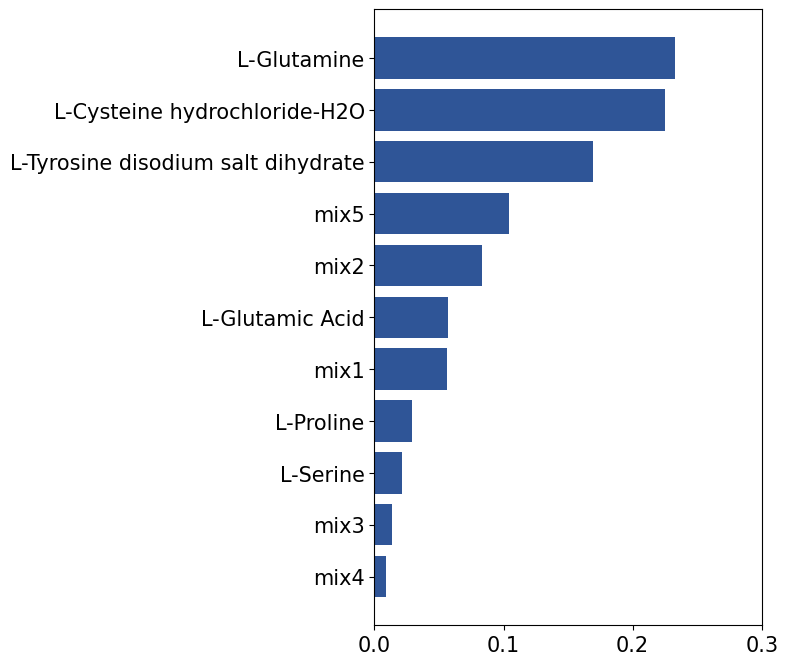

In [9]:
fig, ax = plt.subplots(figsize=(5,8))
ax.tick_params(labelsize=15)
ax.barh(importance_df["Feature"], importance_df["GBDT_Importance"] ,color="#2F5597")
ax.invert_yaxis()
plt.rcParams["font.size"] = 40
ax.set_xticks([0, 0.1, 0.2, 0.3])
plt.savefig("Feature_importance.png",bbox_inches='tight', dpi=300)

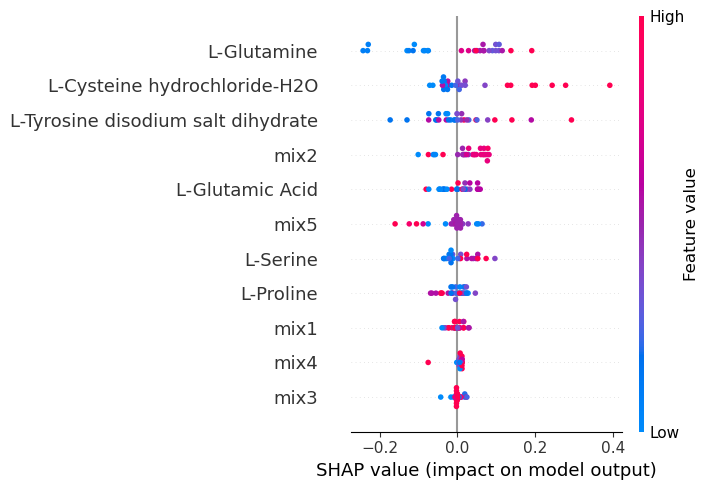

In [10]:
explainer = shap.Explainer(best_model, train[features])
shap_values = explainer(test[features])
shap.summary_plot(shap_values, test[features], feature_names=features, show=False)

plt.savefig("shap_value.png",bbox_inches='tight', dpi=300)